In [1]:
# Importing Libraries 
import pandas as pd
import ast
import seaborn as sns
from datasets import load_dataset 
import matplotlib.pyplot as plt
# Loading Data
dataset = load_dataset ( 'lukebarousse/data_jobs')
df = dataset ['train'].to_pandas ()
# Data Cleanup
df['job_posted_date'] = pd.to_datetime (df ['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)
df_DA_US = df[(df['job_title_short'] == "Data Analyst") & (df['job_country']== 'United States')].copy()

In [3]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

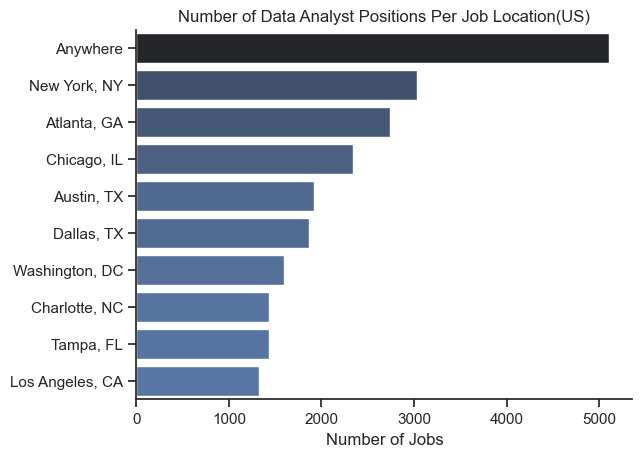

In [10]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x = 'count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Data Analyst Positions Per Job Location(US)')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

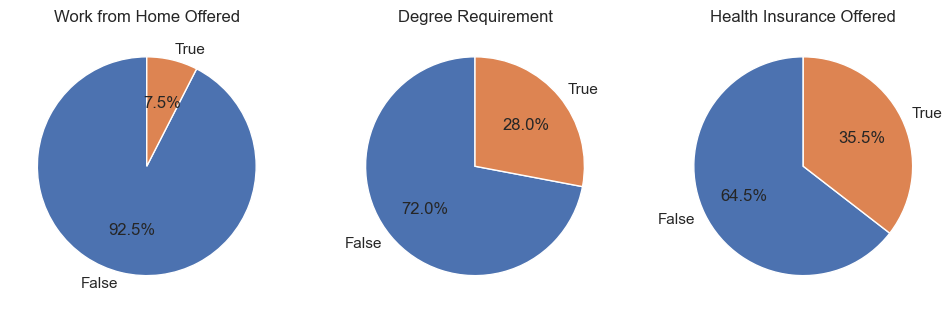

In [11]:
# rewrite the above with a for loop
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

# plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()

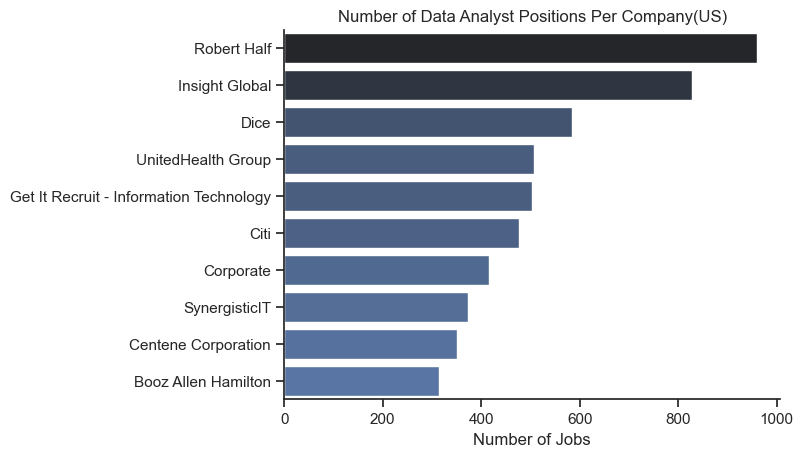

In [12]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x = 'count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Data Analyst Positions Per Company(US)')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()